___
# Ciência dos Dados - PROJETO 1

## Por: Matteo Iannoni
___

## Titulo: Que aparelho de acesso a internet épreferido por cada classe social?

___
## Introdução

Esta pesquisa visa esclarecer a preferência por aparelhos de acesso a internet de cada classe socioeconômica. Para tanto, comparam-se aqui os hábitos das classes A, B, C, D e E (definidas a partir de critérios do IBGE e da FGV) quanto a frequência de uso de tablets, celulares e computadores para acessar a internet. Os resultados obtidos representam, portanto, um retrato suficientemente fiel do mercado brasileiro, podendo assim fundamentar a tomada de decisões estratégicas de marketing e vendas de produtos digitais, como websites e aplicativos mobile.


___
## Análise e Resultados

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [25]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Matteo Iannoni\Documents\GitHub\CDD_P1


In [26]:
## FUNCOES
def setcat(var, categories_list):
    var = var.astype("category")
    var.cat.categories = categories_list
    return var

O primeiro passo para responder a pergunta colocada neste estudo é filtrar a tabela do PNAD de 2015 de forma que ela contenha somente as informações pertinentes à análise. Nesse sentido, as informações necessárias devem incluir: a renda per capita por domicílio e o número de usuários que acessam a internet por meio do celular, de um tablet e/ou de um computador. Para que o estudo não seja corrompido, serão filtrados os valores falhos de pesquisa tal como valores nulos e valores de renda per capita por domicílio maiores do que um milhão de reais.

In [27]:
DataFrame = pd.read_csv('DOM2015.csv',sep=',')
#Abrindo o arquivo com todas as informaçoes 

df_filtro_grosso = pd.DataFrame({"TemCelular":DataFrame["V0220"],
                                 "TemTablet":DataFrame["V02321"],
                                "TemComputador":DataFrame["V0231"],
                                 "UsaTablet":DataFrame["V02325"],
                                "UsaComputador":DataFrame["V02323"],
                                "UsaCelular":DataFrame["V02324"],
                                "RendaPerCapita":DataFrame["V4621"]})
#Criando um dataframe como as colunas que interessam a este estudo

df_filtro_grosso = df_filtro_grosso.dropna(how = "any")
#Tirando os valores nulos da tabela

df_filtro_grosso = df_filtro_grosso[ (df_filtro_grosso["RendaPerCapita"] <= 1000000)]
#Filtrando as pessoas que nao tem algum dos aparelhos ou que tem
#como renda per capita um valor que é claramente erroneo, como 999999999,99 BRL


df_filtro_grosso["UsaComputador"] = df_filtro_grosso["UsaComputador"].astype("category")
df_filtro_grosso["UsaComputador"] = setcat(df_filtro_grosso["UsaComputador"],["Sim","Nao"])

df_filtro_grosso["UsaCelular"] = df_filtro_grosso["UsaCelular"].astype("category")
df_filtro_grosso["UsaCelular"] = setcat(df_filtro_grosso["UsaCelular"],["Sim","Nao"])

df_filtro_grosso["UsaTablet"] = df_filtro_grosso["UsaTablet"].astype("category")
df_filtro_grosso["UsaTablet"] = setcat(df_filtro_grosso["UsaTablet"],["Sim","Nao"])
#Trocando os valores numericos das variaveis qualitativas para seus valores equivalentes em linguagem humana


df_filtro_grosso = df_filtro_grosso.iloc[:,[4,5,6,0]]
#Criando um dataframe com as novas colunas de interesse, dado que todos os usuarios
#tem todos os aparelhos, nao faz sentido mostrar a informacao na tabela

df_filtro_grosso.head()
#Printando os cinco primeiros valores da tabela, para ter certeza de que a informacao
#esta como o planejado, que como pode ser visto, ela esta.

,UsaCelular,UsaComputador,UsaTablet,RendaPerCapita
2,Nao,Sim,Nao,1150.0
3,Sim,Sim,Nao,793.0
5,Nao,Sim,Nao,1990.0
8,Sim,Sim,Nao,818.0
10,Sim,Sim,Nao,1716.0


É possível perceber, pela tabela, que a informação está pronta para ser analisada. Da tabela nova, é necessário criar uma tabela para cada classe social para que se possa responder a pergunta proposta. Sem segregar a informação da tabela original tornaria-se impossível responder a pergunta, e seria impossível entender o que estaria sendo expressado pelos gráficos por que os outliers sao muito discrepantes, como podemos ver no Box Plot a seguir.

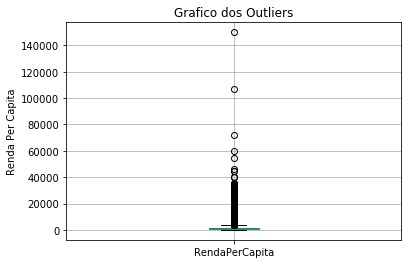

In [28]:
import pylab as pl
from pandas import *

# Separando a tabela anterior em tabelas segregadas por renda, de acordo com as classes
# sociais estabelecidas pelo IBJE e pela FGV em conjunto. Alem desta distribuicao, eu 
# tomei a liberdade de separar a classe A em A1 e A2, para que se torne ainda mais clara
# a comparacao de renda e uso de aparelhos.
#################################################################################################################################
df_renda_classe_E = df_filtro_grosso[df_filtro_grosso["RendaPerCapita"] <= 1254]
df_renda_classe_D = df_filtro_grosso[(1254 < df_filtro_grosso["RendaPerCapita"]) & (df_filtro_grosso["RendaPerCapita"] <= 2004)]
df_renda_classe_C = df_filtro_grosso[(2004 < df_filtro_grosso["RendaPerCapita"]) & (df_filtro_grosso["RendaPerCapita"] <= 8640)]
df_renda_classe_B = df_filtro_grosso[(8640 < df_filtro_grosso["RendaPerCapita"]) & (df_filtro_grosso["RendaPerCapita"] <= 11261)]
df_renda_classe_A1 = df_filtro_grosso[(11261 < df_filtro_grosso["RendaPerCapita"]) & (df_filtro_grosso["RendaPerCapita"] <= 30000)]
df_renda_classe_A2 = df_filtro_grosso[(30000 < df_filtro_grosso["RendaPerCapita"]) & (df_filtro_grosso["RendaPerCapita"] <= 50000)]
#################################################################################################################################


# Demonstracao de porque seria necessario segregar a informacao de acordo com a renda
# mesmo se a pergunta da pesquisa nao implicasse nessa distribuicao,
# pode se perceber do grafico que a distribuicao de renda torna inviavel estudar toda
# a informacao de uma vez
######################################
df_filtro_grosso.boxplot()
plt.title("Grafico dos Outliers")
plt.ylabel("Renda Per Capita")
######################################

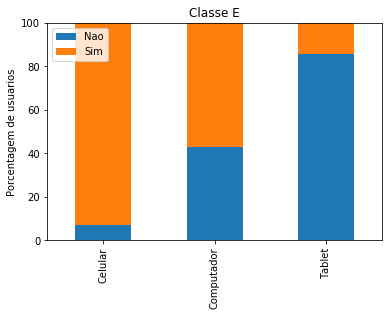

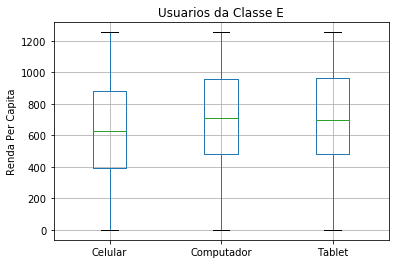

In [29]:
# Grafico de barras stacked comparando o uso relativo de cada aparelho na classe E
##########################################################################
x = DataFrame({"Sim": Series({"Tablet": df_renda_classe_E.UsaTablet.value_counts(normalize = True)[0]*100, "Celular": df_renda_classe_E.UsaCelular.value_counts(normalize = True)[0]*100, "Computador":df_renda_classe_E.UsaComputador.value_counts(normalize = True)[0]*100}), "Nao": Series({"Tablet": df_renda_classe_E.UsaTablet.value_counts(normalize = True)[1]*100, "Celular": df_renda_classe_E.UsaCelular.value_counts(normalize = True)[1]*100, "Computador":df_renda_classe_E.UsaComputador.value_counts(normalize = True)[1]*100})})
x.plot(kind="bar", legend=False, stacked = True).set_ylim([0, 100])
plt.title("Classe E")
l = pl.legend(('Nao','Sim'), loc='best')
plt.ylabel("Porcentagem de usuarios")
plt.show()
##########################################################################

# Box plot da renda per capita por domicilio somente dos usuarios de cada aparelho
##########################################################################
x = DataFrame({"Tablet": df_renda_classe_E[df_renda_classe_E["UsaTablet"] == "Sim"].RendaPerCapita, "Celular": df_renda_classe_E[df_renda_classe_E["UsaCelular"] == "Sim"].RendaPerCapita, "Computador":df_renda_classe_E[df_renda_classe_E["UsaComputador"] == "Sim"].RendaPerCapita})
x.boxplot()
plt.ylabel("Renda Per Capita")
plt.title("Usuarios da Classe E")
#########################################################################

Ao observar o primeiro gráfico, percebe-se a distribuição distinta do uso dos aparelhos para acessar a internet na classe E. É notável como o tablet tem um número substancialmente menor de usuários que qualquer outro aparelho. O segundo aparelho menos usado é o computador, enquanto o aparelho de maior uso é o celular. Também fica evidente que parte dos indivíduos da classe E pesquisados não acessam a internet por meio de nenhum dos aparelhos tratados neste estudo. Assim, para o maior aproveitamento do mercado da classe E, seria melhor desenvolver estratégias de marketing e vendas que tenham por alvo primário usuários de aparelhos celulares; em segundo lugar na escala de prioridade de público-alvo estariam os usuários de computadores, e em terceiro e último lugar os usuários de tablets.

Observando o segundo gráfico, é possível perceber que a distribuição de renda na classe E é semelhante para os usuários dos três aparelhos, ainda que a renda per capita por domicílio dos usuários de celular seja ligeiramente mais baixa. Um dos motivos para essa distribuição similar seria o fato de a classe E abranger pessoas com renda per capita por domicílio de aproximadamente 0,5 a 1 salário mínimo -- o que constitui uma parcela majoritária da população pesquisada (como implica o Gráfico dos Outliers). A partir dessas considerações, conclui-se que os usuários da classe E com maior renda são ambos os de computadores e os de tablets, ao passo que os usuários de celular têm renda per capita por domicílio menor que a dos outros usuários.

Finalmente, a comparação dos dois gráficos sugere que é mais proveitoso investir em marketing e vendas de produtos online para usuários de celulares da classe E, uma vez que a quantidade de usuários a mais compensa, já que a renda per capita é marginalmente mais baixa que a dos outros usuários (a renda per capita por domicílio de usuários de celular é, em média, 14,28% menor que a dos outros). Porém, a quantidade de usuários de celular chega a ser mais de 20% maior que a quantidade de usuários de computadores, especialmente quando comparada ao número de usuários de tablets.


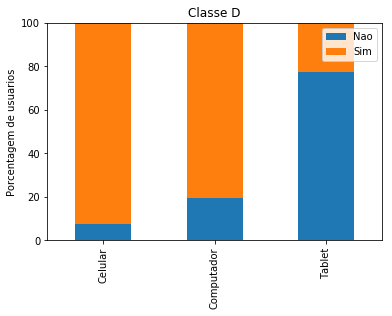

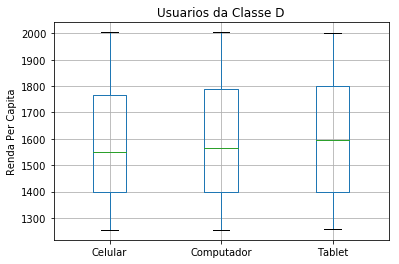

In [30]:
# Grafico de barras stacked comparando o uso relativo de cada aparelho na classe D
##########################################################################
x = DataFrame({"Sim": Series({"Tablet": df_renda_classe_D.UsaTablet.value_counts(normalize = True)[0]*100, "Celular": df_renda_classe_D.UsaCelular.value_counts(normalize = True)[0]*100, "Computador":df_renda_classe_D.UsaComputador.value_counts(normalize = True)[0]*100}), "Nao": Series({"Tablet": df_renda_classe_D.UsaTablet.value_counts(normalize = True)[1]*100, "Celular": df_renda_classe_D.UsaCelular.value_counts(normalize = True)[1]*100, "Computador":df_renda_classe_D.UsaComputador.value_counts(normalize = True)[1]*100})})
x.plot(kind="bar", legend=False, stacked = True).set_ylim([0, 100])
plt.title("Classe D")
l = pl.legend(('Nao','Sim'), loc='best')
plt.ylabel("Porcentagem de usuarios")
plt.show()
##########################################################################
x = DataFrame({"Tablet": df_renda_classe_D[df_renda_classe_D["UsaTablet"] == "Sim"].RendaPerCapita, "Celular": df_renda_classe_D[df_renda_classe_D["UsaCelular"] == "Sim"].RendaPerCapita, "Computador":df_renda_classe_D[df_renda_classe_D["UsaComputador"] == "Sim"].RendaPerCapita})
x.boxplot()
plt.ylabel("Renda Per Capita")
plt.title("Usuarios da Classe D")
##########################################################################

O primeiro gráfico mostra uma distribuição semelhante de usuários de computadores e de usuários de celulares, em contraponto ao número pequeno de usuários de tablets na classe D. O tablet continua com um número substancialmente menor de usuários que qualquer outro aparelho. O segundo aparelho menos usado ainda é o computador, enquanto o aparelho de maior uso ainda é o celular. Vale notar que mesmo na classe D ainda existem pessoas que não acessam a internet com nenhum dos aparelhos tratados aqui. Assim, para o maior aproveitamento do mercado da classe D, assim como na classe E, seria melhor desenvolver estratégias de marketing e vendas que visem usuários de aparelhos celulares; em segundo lugar estariam os usuários de computadores e em terceiro lugar os usuários de tablets.
 
A partir do segundo gráfico, constata-se que a distribuição de renda na classe D é semelhante para os usuários dos três aparelhos, ainda que a renda per capita por domicílio dos usuários de tablets seja ligeiramente mais alta. Essa distribuição reflete o caráter de cada tipo de aparelho: o celular é praticamente indispensável nos dias de hoje, bem como o computador; mas o tablet e um bem supérfluo e, portanto, seus usuários são aqueles de maior renda. Feita essa apreciação, concluímos que os usuários da classe D com maior renda são os de tablets, enquanto os usuários de celular e os de computadores têm renda per capita por domicílio menor.

Por fim, ao comparar os dois gráficos, fica aparente a necessidade de direcionar investimentos ao mercado de usuários de celulares e computadores da classe D, visto que a renda per capita por domicílio de usuários de tablets não justifica a menor quantidade de usuários (a renda per capita por domicílio de usuários de tablet é, em média, 3,13% maior que a dos outros). Entretanto, o número de usuários de tablets chega a ser cerca de 60% menor que a quantidade de usuários de computadores, valor que é ainda mais discrepante quando comparado ao número de usuários de celular.


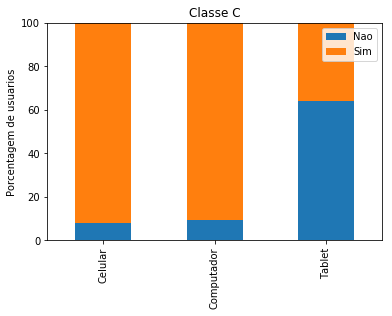

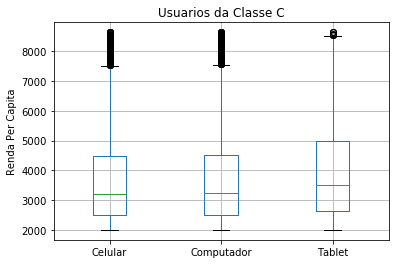

In [31]:
# Grafico de barras stacked comparando o uso relativo de cada aparelho na classe C
##########################################################################
x = DataFrame({"Sim": Series({"Tablet": df_renda_classe_C.UsaTablet.value_counts(normalize = True)[0]*100, "Celular": df_renda_classe_C.UsaCelular.value_counts(normalize = True)[0]*100, "Computador":df_renda_classe_C.UsaComputador.value_counts(normalize = True)[0]*100}), "Nao": Series({"Tablet": df_renda_classe_C.UsaTablet.value_counts(normalize = True)[1]*100, "Celular": df_renda_classe_C.UsaCelular.value_counts(normalize = True)[1]*100, "Computador":df_renda_classe_C.UsaComputador.value_counts(normalize = True)[1]*100})})
x.plot(kind="bar", legend=False, stacked = True).set_ylim([0, 100])
plt.title("Classe C")
l = pl.legend(('Nao','Sim'), loc='best')
plt.ylabel("Porcentagem de usuarios")
plt.show()
##########################################################################
x = DataFrame({"Tablet": df_renda_classe_C[df_renda_classe_C["UsaTablet"] == "Sim"].RendaPerCapita, "Celular": df_renda_classe_C[df_renda_classe_C["UsaCelular"] == "Sim"].RendaPerCapita, "Computador":df_renda_classe_C[df_renda_classe_C["UsaComputador"] == "Sim"].RendaPerCapita})
x.boxplot()
plt.ylabel("Renda Per Capita")
plt.title("Usuarios da Classe C")
##########################################################################

O primeiro gráfico mostra uma distribuição similar de usuários de computadores e de usuários de celulares, o que contrasta com os poucos usuários de tablets na classe C. O tablet continua com um número substancialmente menor de usuários que qualquer outro aparelho. Já o computador e o celular têm aproximadamente a mesma quantidade de usuários na classe C. Ainda, é válido notar que mesmo na classe C ainda existem pessoas que não acessam a internet com nenhum dos aparelhos em questão. Assim, para o maior aproveitamento do mercado da classe C, de maneira análoga às classes E e D, seria melhor desenvolver estratégias de captação de usuários de celulares e computadores; em segundo plano, priorizariam-se os usuários de tablets.

Ao analisar o segundo gráfico, é possível perceber que a distribuição de renda na classe C é semelhante para os usuários dos três aparelhos, considerando, inclusive, que a renda per capita por domicílio dos usuários de tablets é ligeiramente mais alta. Essa distribuição é mais uma vez reflexo do tipo de bem que esses aparelhos são: enquanto o celular e o computador são basicamente indispensáveis, o tablet é supérfluo; advém daí que os usuários de maior renda são também os que utilizam tablets. Levando esses fatores em consideração, conclui-se que os usuários da classe C com maior renda são os de tablets, ao passo que os usuários de celular e os de computadores têm renda per capita por domicílio menor.

Finalmente, a comparação dos dois gráficos insinua o maior proveito de estratégias que visem usuários de celulares e computadores da classe C, uma vez que a renda per capita por domicílio de usuários de tablets não justifica o menor número de usuários; e, mesmo que seja maior do que a da classe D, a renda per capita por domicílio de usuários de tablet é, em média, 7,14% maior que a dos demais. Porém, a quantidade de usuários de tablets chega a ser aproximadamente 50% menor que a quantidade de usuários de computadores e igual ao número de usuários de celular.


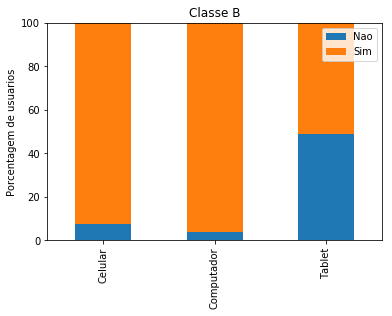

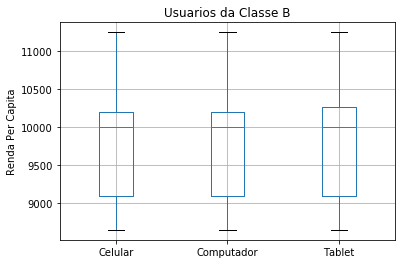

In [32]:
# Grafico de barras stacked comparando o uso relativo de cada aparelho na classe B
##########################################################################
x = DataFrame({"Sim": Series({"Tablet": df_renda_classe_B.UsaTablet.value_counts(normalize = True)[0]*100, "Celular": df_renda_classe_B.UsaCelular.value_counts(normalize = True)[0]*100, "Computador":df_renda_classe_B.UsaComputador.value_counts(normalize = True)[0]*100}), "Nao": Series({"Tablet": df_renda_classe_B.UsaTablet.value_counts(normalize = True)[1]*100, "Celular": df_renda_classe_B.UsaCelular.value_counts(normalize = True)[1]*100, "Computador":df_renda_classe_B.UsaComputador.value_counts(normalize = True)[1]*100})})
x.plot(kind="bar", legend=False, stacked = True).set_ylim([0, 100])
plt.title("Classe B")
l = pl.legend(('Nao','Sim'), loc='best')
plt.ylabel("Porcentagem de usuarios")
plt.show()
##########################################################################
x = DataFrame({"Tablet": df_renda_classe_B[df_renda_classe_B["UsaTablet"] == "Sim"].RendaPerCapita, "Celular": df_renda_classe_B[df_renda_classe_B["UsaCelular"] == "Sim"].RendaPerCapita, "Computador":df_renda_classe_B[df_renda_classe_B["UsaComputador"] == "Sim"].RendaPerCapita})
x.boxplot()
plt.ylabel("Renda Per Capita")
plt.title("Usuarios da Classe B")
##########################################################################

O primeiro gráfico mostra que há mais usuários de computadores do que de celulares, o que se contrapõe aos poucos usuários de tablets na classe B. O tablet continua com um número menor de usuários que qualquer outro aparelho; porém, na classe B essa discrepância é menor. Diferentemente das outras classes socioeconômicas tratadas até agora, o gráfico demonstra que o computador tem mais usuários do que o celular. Vale ressaltar que mesmo na classe B ainda existem pessoas que não acessam a internet com nenhum dos aparelhos em questão. Assim, para melhor atingir o mercado da classe B, não mais como as classes C, D e E, seria melhor visar os usuários de computadores; em segundo lugar na escala de prioridade estariam os usuários de celulares, e em terceiro lugar os usuários de tablets.
Percebe-se pelo segundo gráfico que a distribuição de renda na classe B é semelhante para os usuários dos três tipos de aparelhos, mesmo que a renda per capita por domicílio dos usuários de tablets seja -- mais uma vez -- um pouco maior (o terceiro quartil dos usuários de tablet tem renda ligeiramente mais alta). Essa distribuição faz sentido visto o tipo de bem que é o tablet (afinal, um bem supérfluo, diferente do computador e do celular, que são imprescindíveis). É válido notar que a classe B é a única que tem mais usuários de computador do que de celular. Sabendo disso, chega-se à conclusão de que os usuários da classe C com maior renda são os de tablets, ao passo que os usuários de celular e os de computadores têm renda per capita por domicílio menor.
Finalmente, a comparação dos dois gráficos sugere que é mais proveitoso investir em campanhas para usuários de celulares e computadores na classe B, já que a renda per capita por domicílio de usuários de tablets não justifica a diferença de usuários (mesmo que seja maior do que a da classe D, a renda per capita por domicílio de usuários de tablet e praticamente igual a dos outros usuários). Porém, a quantidade de usuários de tablets chega a ser aproximadamente 40% menor que a quantidade de usuários de celulares -- a classe B é a classe na qual o tablet chega a uma distribuição de 1:1 no número de usuários, diferentemente de todas as classes mais baixas que a B, que têm mais “não-usuários” do que usuários de tablets.


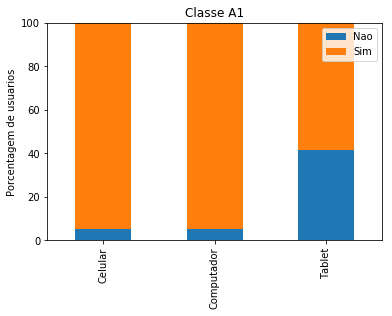

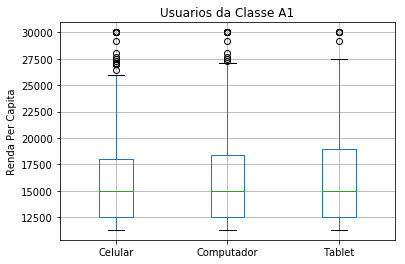

In [33]:
# Grafico de barras stacked comparando o uso relativo de cada aparelho na classe A1
##########################################################################
x = DataFrame({"Sim": Series({"Tablet": df_renda_classe_A1.UsaTablet.value_counts(normalize = True)[0]*100, "Celular": df_renda_classe_A1.UsaCelular.value_counts(normalize = True)[0]*100, "Computador":df_renda_classe_A1.UsaComputador.value_counts(normalize = True)[0]*100}), "Nao": Series({"Tablet": df_renda_classe_A1.UsaTablet.value_counts(normalize = True)[1]*100, "Celular": df_renda_classe_A1.UsaCelular.value_counts(normalize = True)[1]*100, "Computador":df_renda_classe_A1.UsaComputador.value_counts(normalize = True)[1]*100})})
x.plot(kind="bar", legend=False, stacked = True).set_ylim([0, 100])
plt.title("Classe A1")
l = pl.legend(('Nao','Sim'), loc='best')
plt.ylabel("Porcentagem de usuarios")
plt.show()
##########################################################################
x = DataFrame({"Tablet": df_renda_classe_A1[df_renda_classe_A1["UsaTablet"] == "Sim"].RendaPerCapita, "Celular": df_renda_classe_A1[df_renda_classe_A1["UsaCelular"] == "Sim"].RendaPerCapita, "Computador":df_renda_classe_A1[df_renda_classe_A1["UsaComputador"] == "Sim"].RendaPerCapita})
x.boxplot()
plt.ylabel("Renda Per Capita")
plt.title("Usuarios da Classe A1")

O primeiro grafico mostra uma distribuicao semelhante de usuarios de computadores e de usuarios de celulares que contrasta com os usuarios de tablets na classe A1, que sao pouco mais que a metade. Os usuarios de tablet na classe A1 passam de 50% da populacao estudada. O computador e o celular tem aproximadamente a mesma quantidade de usuarios. E valido notar que mesmo na classe A1 ainda existem pessoas que nao acessam a internet com nenhum dos aparelhos tratados nessa pesquisa. Assim, para o maior aproveitamento do mercado da classe A1, semelhante as outras classes sociais, seria melhor desenvolver estrategias de marketing e vendas que tenham por alvo primario usuarios de aparelhos celulares e computadores; em segundo lugar na escala de prioridade de publico-alvo estariam os usuarios de tablets.

Novamente, observando o segundo grafico, e possivel perceber que a distribuicao de renda na classe A1 e semelhante para os usuarios dos tres aparelhos, ainda que a renda per capita por domicilio dos usuarios de tablets seja ligeiramente mais alta do que as demais. Essa distribuicao volta a resonar com o tipo de bem que esses aparelhos sao; o celular e o computador, principalmente em empregos cujos salarios sao mais altos, sao bens indispensaveis, porem, o tablet e um bem superfulo e portanto os usuarios de maior renda sao tambem os que utilizam tablets. A partir dessas consideracoes, conclui-se que os usuarios da classe A1 com maior renda sao os de tablets, porem, essa diferenca e negligenciavel.

Finalmente, a comparacao dos dois graficos sugere que e mais proveitoso investir em marketing e vendas de produtos online para usuarios de celulares e computadores da classe A1, e que o mercado de tablets, apesar de ser menor, tem grande numero de potenciais usuarios. A hierarquia de prioridade de investimento em marketing e produtos online e liderada pelos usuarios de computador, por ter um terceiro quartil de renda per capita por domicilio superior aos de Celular, que sao seguidos pelos usuarios de tablet.

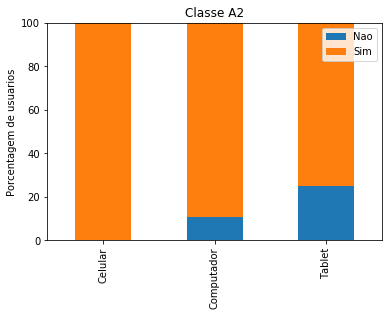

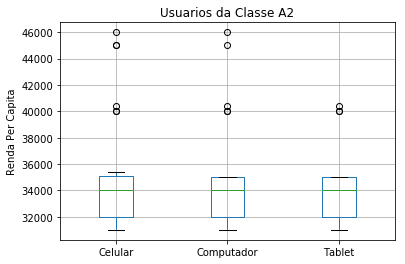

In [34]:
# Grafico de barras stacked comparando o uso relativo de cada aparelho na classe A2
##########################################################################
x = DataFrame({"Sim": Series({"Tablet": df_renda_classe_A2.UsaTablet.value_counts(normalize = True)[0]*100, "Celular": df_renda_classe_A2.UsaCelular.value_counts(normalize = True)[0]*100, "Computador":df_renda_classe_A2.UsaComputador.value_counts(normalize = True)[0]*100}), "Nao": Series({"Tablet": df_renda_classe_A2.UsaTablet.value_counts(normalize = True)[1]*100, "Celular": df_renda_classe_A2.UsaCelular.value_counts(normalize = True)[1]*100, "Computador":df_renda_classe_A2.UsaComputador.value_counts(normalize = True)[1]*100})})
x.plot(kind="bar", legend=False, stacked = True).set_ylim([0, 100])
plt.title("Classe A2")
l = pl.legend(('Nao','Sim'), loc='best')
plt.ylabel("Porcentagem de usuarios")
plt.show()
##########################################################################
x = DataFrame({"Tablet": df_renda_classe_A2[df_renda_classe_A2["UsaTablet"] == "Sim"].RendaPerCapita, "Celular": df_renda_classe_A2[df_renda_classe_A2["UsaCelular"] == "Sim"].RendaPerCapita, "Computador":df_renda_classe_A2[df_renda_classe_A2["UsaComputador"] == "Sim"].RendaPerCapita})
x.boxplot()
plt.ylabel("Renda Per Capita")
plt.title("Usuarios da Classe A2")

O primeiro gráfico mostra que praticamente todas as pessoas na classe A2 acessam a internet com pelo menos o seu celular, e que aproximadamente 90% das pessoas acessa a internet com o computador e aproximadamente 85% das pessoas acessa a internet usando um tablet. Assim, para o maior aproveitamento do mercado da classe A1, de modo semelhante às outras classes sociais, seria melhor desenvolver estratégias de marketing e vendas que tenham por alvo primário usuários de aparelhos celulares; em segundo lugar estariam os usuários de computadores, e em terceiro lugar os de tablets.

Observando o segundo gráfico, percebe-se que a distribuição de renda na classe A2 é praticamente igual para os usuários dos três aparelhos. Essa distribuição vincula-se ao nível de renda per capita por domicílio da classe A2, que, por ser tão alto, não torna menos evidente o caráter supérfluo ou indispensável de cada tipo de aparelho. A partir dessas considerações, conclui-se que os usuários da classe A2 têm renda praticamente idêntica.

Finalmente, a comparação dos dois gráficos sugere que apesar de ser mais proveitoso investir em marketing e vendas online para usuários de celular e computador, os usuários de tablet não podem ser ignorados. A hierarquia de prioridade de investimento é liderada novamente pelos usuários de celular, por representarem 100% das pessoas que estão na classe A2.


___
## Conclusão 

Descreva aqui suas conclusões!

Este estudo conclui-se com a resposta da pergunta "Que aparelho de acesso a internet é preferido por cada classe social?", que é: para classes sociais com renda per capita por domicílio menor, é mais proveitoso investir em marketing e vendas de produtos online para celular; para classes sociais com renda per capita por domicílio maior, essa análise torna-se nebulosa -- mas a conclusão continua a mesma que para a classe A2, na qual os três aparelhos são usados o bastante para que valha a pena investir em marketing e vendas de produtos online para qualquer um deles.

A única classe que quebra a hierarquia de prioridade, na qual o celular lidera, o computador segue e o tablet vem por último, é a classe B, na qual o computador é líder no número de usuários. É possível aproveitar uma porcentagem maior da classe B do que das demais. Vale ressaltar que o que está sendo explorado nesta pesquisa é a preferência de cada classe socioeconômica por um aparelho para acessar a internet e, portanto, o valor absoluto de usuários não foi de interesse da pesquisa.
